In [1]:
import os
import json

import pandas as pd
#df = pd.DataFrame(columns=['post', 'bound', 'index', 'label', 'pred', 'epsilon', 'p_safe_attack': 1.0, 'd_safe_attack': True, 'p_safe_bounds' , 'd_safe_bounds', 'beps', 'bdelt', 'balpha', 'iterations_attack', 'iterations_bounds', 'veri_time', 'attk_time'])
rows = []
def load(dataset, bound):
    entries = []
    path = "ExperimentalLogs/%s_%s.log"%(dataset, bound)
    with open(path) as log_file:
        for line in log_file:
            #print(json.loads(line))
            entries.append(json.loads(line))
            entry = json.loads(line)
            #entry['Dataset'] = dataset
            #entry['Bound'] = bound
            entry['Dataset'] = dataset[0:-1]
            entry['Bound'] = bound
            rows.append(entry)
    return entries


log_info = load("boston1", "chernoff")
log_info = load("concrete1", "chernoff")
log_info = load("yacht1", "chernoff")
log_info = load("powerplant1", "chernoff")
log_info = load("energy1", "chernoff")
log_info = load("kin8nm1", "chernoff")
log_info = load("naval1", "chernoff")
log_info = load("wine1", "chernoff")


log_info = load("boston1", "massart")
log_info = load("concrete1", "massart")
log_info = load("yacht1", "massart")
log_info = load("powerplant1", "massart")
log_info = load("energy1", "massart")
log_info = load("kin8nm1", "massart")
log_info = load("naval1", "massart")
log_info = load("wine1", "massart")


In [2]:
df = pd.DataFrame.from_dict(rows, orient='columns')
df.head()

,index,label,pred,epsilon,p_safe_attack,d_safe_attack,p_safe_bounds,d_safe_bounds,beps,bdelt,balpha,iterations_attack,iterations_bounds,veri_time,attk_time,Dataset,Bound
0,0,21.551691,21.526541,0.01,1.0,True,0.814570,True,0.05,0.1,0.05,151.0,151.0,0.589912,14.095203,boston,chernoff
1,1,27.039705,27.060947,0.01,1.0,True,1.000000,True,0.05,0.1,0.05,151.0,151.0,0.681588,16.336607,boston,chernoff
2,2,42.760319,42.766071,0.01,1.0,True,0.000000,True,0.05,0.1,0.05,151.0,151.0,0.701659,15.625894,boston,chernoff
3,3,13.824980,13.819980,0.01,1.0,True,0.000000,False,0.05,0.1,0.05,151.0,151.0,0.622936,15.211228,boston,chernoff
4,4,19.090126,19.129631,0.01,1.0,True,0.927152,True,0.05,0.1,0.05,151.0,151.0,0.603868,15.078752,boston,chernoff


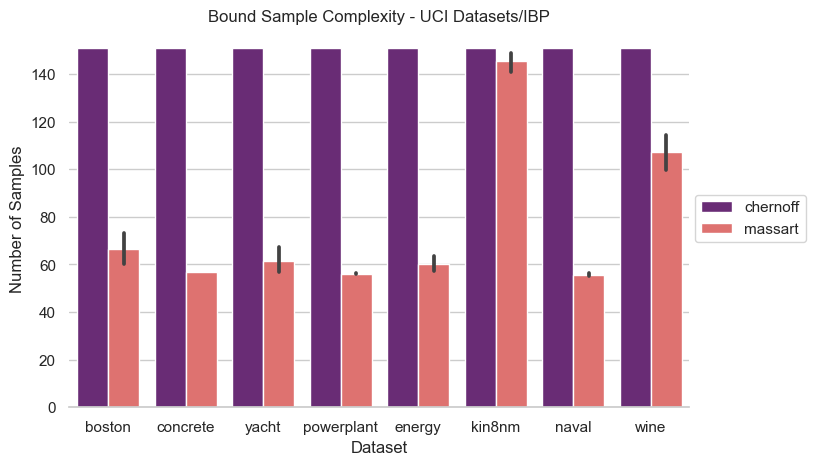

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5), dpi=100)

sns.set_theme(style="whitegrid")
pal = sns.color_palette("magma", 2)

sns.barplot(x="Dataset", y="iterations_bounds", hue="Bound",
                 data=df, palette=pal)

plt.title("Bound Sample Complexity - UCI Datasets/IBP")
plt.ylabel("Number of Samples")
plt.xlabel("Dataset")

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")


plt.show()

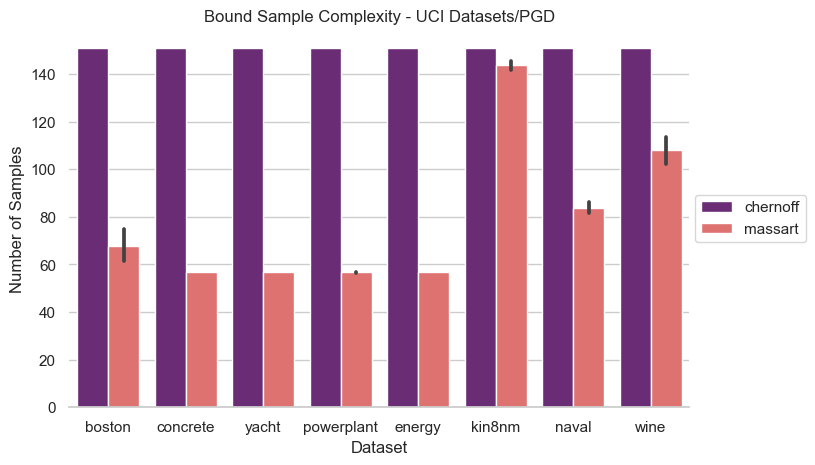

In [4]:
plt.figure(figsize=(8, 5), dpi=100)

sns.set_theme(style="whitegrid")

sns.barplot(x="Dataset", y="iterations_attack", hue="Bound",
                 data=df, palette=pal)

plt.title("Bound Sample Complexity - UCI Datasets/PGD")
plt.ylabel("Number of Samples")
plt.xlabel("Dataset")

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.show()

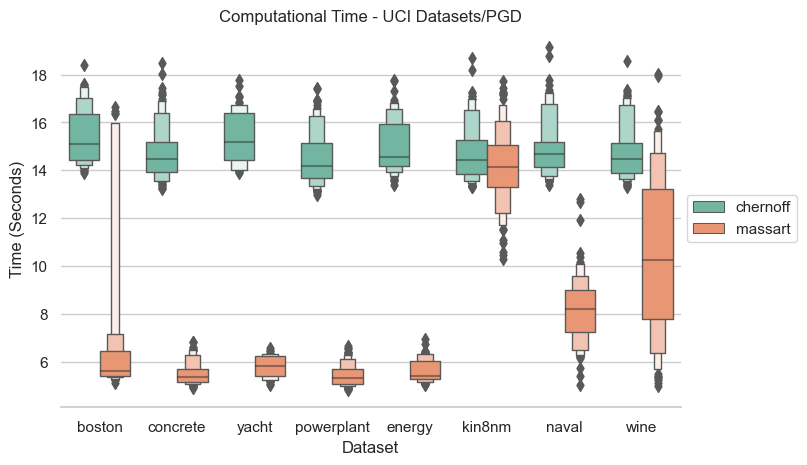

In [5]:
plt.figure(figsize=(8, 5), dpi=100)

sns.set_theme(style="whitegrid")

#sns.boxplot(data=df, x="Posterior", y="d_safe_attack", hue="Method",
#                inner="quart", linewidth=1,
#               palette={"Attack": "b", "Cert": ".85"})


sns.boxenplot(x="Dataset", y="attk_time", hue="Bound",
                 data=df, palette="Set2")

plt.title("Computational Time - UCI Datasets/PGD")
plt.ylabel("Time (Seconds)")
plt.xlabel("Dataset")

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.show()

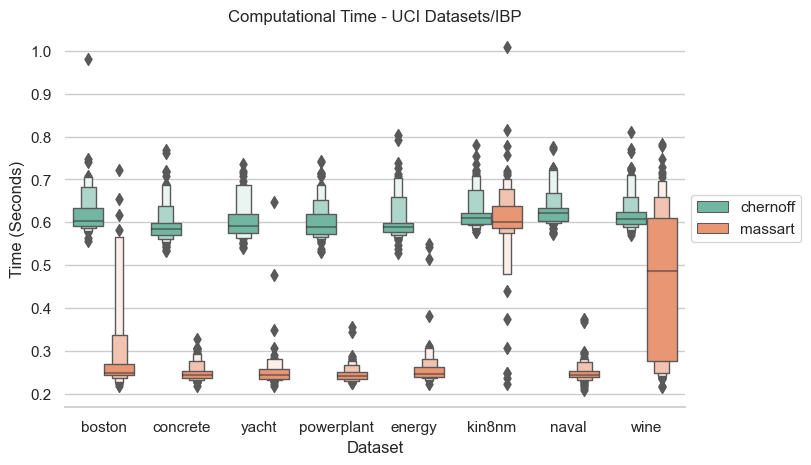

In [6]:
plt.figure(figsize=(8, 5), dpi=100)

sns.set_theme(style="whitegrid")

#sns.boxplot(data=df, x="Posterior", y="d_safe_attack", hue="Method",
#                inner="quart", linewidth=1,
#               palette={"Attack": "b", "Cert": ".85"})


sns.boxenplot(x="Dataset", y="veri_time", hue="Bound",
                 data=df, palette="Set2")

plt.title("Computational Time - UCI Datasets/IBP")
plt.ylabel("Time (Seconds)")
plt.xlabel("Dataset")

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.show()